In [130]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from plotnine import *
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 

In [133]:
url = 'https://raw.githubusercontent.com/min-is/nba/refs/heads/main/datasets/jaysontatum.csv'
df = pd.read_csv(url)
df = pd.get_dummies(df, columns = ["Opp"])

df = df.fillna(0)  # Replace NaNs
df = df.replace([np.inf, -np.inf], 0)

features = [col for col in df.columns if col != "PTS"]

df.head()
print(features)

['Ven', 'WinMar', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', '+/-', 'TS%', 'eFG%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'BPM', 'Opp_ATL', 'Opp_BRK', 'Opp_CHI', 'Opp_CHO', 'Opp_CLE', 'Opp_DAL', 'Opp_DEN', 'Opp_DET', 'Opp_GSW', 'Opp_HOU', 'Opp_IND', 'Opp_LAC', 'Opp_LAL', 'Opp_MEM', 'Opp_MIA', 'Opp_MIL', 'Opp_MIN', 'Opp_NOP', 'Opp_NYK', 'Opp_OKC', 'Opp_ORL', 'Opp_PHI', 'Opp_PHO', 'Opp_POR', 'Opp_SAC', 'Opp_SAS', 'Opp_TOR', 'Opp_UTA', 'Opp_WAS']


In [198]:

X = df[features]
y = df["PTS"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

z = StandardScaler()
X_train_scaled = z.fit_transform(X_train)
X_test_scaled = z.transform(X_test)

model = Sequential([
    Dense(2048, input_shape=(X_train_scaled.shape[1],)),
    LeakyReLU(alpha=0.01),
    Dense(1024),
    Dropout(0.3),
    Dense(512),
    LeakyReLU(alpha=0.01),
    Dense(256),
    Dense(128),
    LeakyReLU(alpha=0.01),
    Dense(128),
    LeakyReLU(alpha=0.01),
    Dense(128),
    Dropout(0.2),
    Dense(64),
    Dense(32),
    LeakyReLU(alpha=0.01),
    Dense(16),
    Dense(8),
    Dense(1)  # No activation for regression task
])

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 2048)              135168    
                                                                 
 leaky_re_lu_44 (LeakyReLU)  (None, 2048)              0         
                                                                 
 dense_173 (Dense)           (None, 1024)              2098176   
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 dense_174 (Dense)           (None, 512)               524800    
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_175 (Dense)           (None, 256)             

In [199]:
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='mse', metrics=["mae"])


# Train Model
history = model.fit(
    X_train_scaled, y_train,
    epochs=1000, batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

Epoch 1/1000
7/7 [==============================] - 1s 39ms/step - loss: 855.8322 - mae: 28.1427 - val_loss: 746.8702 - val_mae: 26.0624
Epoch 2/1000
7/7 [==============================] - 0s 23ms/step - loss: 849.3556 - mae: 28.0287 - val_loss: 740.7353 - val_mae: 25.9454
Epoch 3/1000
7/7 [==============================] - 0s 21ms/step - loss: 843.1580 - mae: 27.9148 - val_loss: 733.4828 - val_mae: 25.8067
Epoch 4/1000
7/7 [==============================] - 0s 22ms/step - loss: 835.4099 - mae: 27.7749 - val_loss: 724.9050 - val_mae: 25.6419
Epoch 5/1000
7/7 [==============================] - 0s 23ms/step - loss: 825.9935 - mae: 27.6070 - val_loss: 714.0247 - val_mae: 25.4307
Epoch 6/1000
7/7 [==============================] - 0s 22ms/step - loss: 814.9501 - mae: 27.4022 - val_loss: 700.0076 - val_mae: 25.1562
Epoch 7/1000
7/7 [==============================] - 0s 22ms/step - loss: 799.1465 - mae: 27.1207 - val_loss: 682.1696 - val_mae: 24.8019
Epoch 8/1000
7/7 [=======================

In [200]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicting the target (PTS) on the test set
y_pred = model.predict(X_test_scaled)

# Calculating performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

2/2 [==============================] - 0s 4ms/step
Mean Absolute Error (MAE): 1.9773358258334073
Mean Squared Error (MSE): 5.8063896066841405
Root Mean Squared Error (RMSE): 2.4096451204864464
R-squared (R²): 0.914524655407954


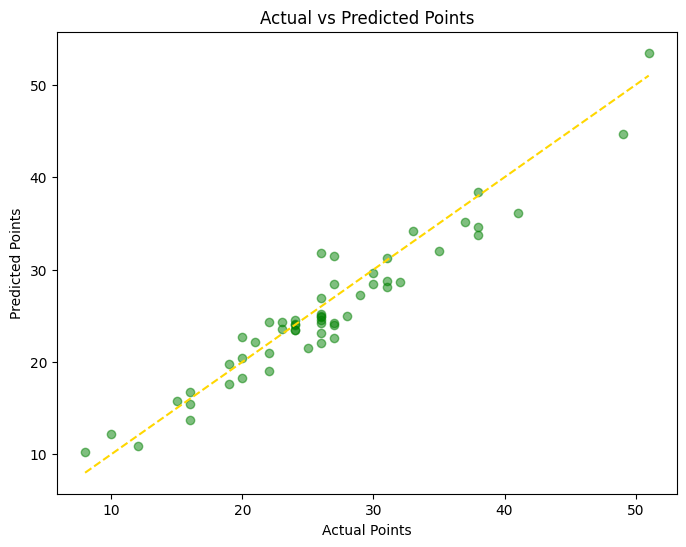

In [205]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gold', linestyle='--')
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Actual vs Predicted Points")
plt.show()

In [209]:
def get_average_stats_against_opponent(df, opponent):
    opponent_column = f"Opp_{opponent}"
    if opponent_column not in df.columns:
        raise ValueError(f"Opponent column {opponent_column} does not exist in the dataset.")
    
    opponent_data = df[df[opponent_column] == 1] 
    average_stats = opponent_data[features].mean() 
    
    return average_stats

opponent = "MIN"
average_stats = get_average_stats_against_opponent(df, opponent)

def get_average_stats_past_five_games(df):
    past_5_games = df.tail(5)  
    average_past_5_games = past_5_games[features].mean() 
    return average_past_5_games

lastfive = get_average_stats_past_five_games(df)
print(lastfive)


Ven         0.600
WinMar     11.600
GS          1.000
MP         34.866
FG         10.000
            ...  
Opp_SAC     0.000
Opp_SAS     0.200
Opp_TOR     0.000
Opp_UTA     0.000
Opp_WAS     0.000
Length: 65, dtype: float64
